In [1]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
# plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

#for multicollinearity
import statsmodels.api as sm
from statsmodels.datasets.longley import load_pandas

In [2]:
df=pd.read_excel('uci-secom.xlsx')

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
# 피쳐name이 숫자가 아닌 문자인 열들 df_a로 저장
df_a = df.loc[:,['Time', 'Pass/Fail']] # 'Time', 'Pass/Fail'열만 추출하기.

In [5]:
# 피쳐name이 숫자인 모든 열을 문자열로 변경함 
# 0,1,2, ----------> V0,V1,V2
df_b = df.drop(['Time', 'Pass/Fail'], axis=1).add_prefix('v')

In [6]:
from statsmodels.formula.api import ols

In [7]:
df = pd.concat([df_a, df_b], axis=1)

In [8]:
# 전치시킴
df_statistic = df.describe().transpose()
df_statistic

,count,mean,std,min,25%,50%,75%,max
Pass/Fail,1567.0,-0.867262,0.498010,-1.0000,-1.000000,-1.00000,-1.000000,1.0000
v0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
v1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
v2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
v3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
...,...,...,...,...,...,...,...,...
v585,1566.0,3.067826,3.578033,1.1975,2.306500,2.75765,3.295175,99.3032
v586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.02050,0.027600,0.1028
v587,1566.0,0.016475,0.008808,0.0032,0.010600,0.01480,0.020300,0.0799
v588,1566.0,0.005283,0.002867,0.0010,0.003300,0.00460,0.006400,0.0286


In [9]:
remove_no_meaning_cols = df_statistic[df_statistic['std'] == 0].index # index만(= 전치행렬이기때문에, 피쳐이름 ) 추출 
remove_no_meaning_cols 

Index(['v5', 'v13', 'v42', 'v49', 'v52', 'v69', 'v97', 'v141', 'v149', 'v178',
       ...
       'v529', 'v530', 'v531', 'v532', 'v533', 'v534', 'v535', 'v536', 'v537',
       'v538'],
      dtype='object', length=116)

In [10]:
df_2 = df.drop(remove_no_meaning_cols, axis=1) # 지우자.

In [11]:
df_2=df_2.drop('Time',axis=1)

In [12]:
df_2

,Pass/Fail,v0,v1,v2,v3,v4,v6,v7,v8,v9,...,v580,v581,v582,v583,v584,v585,v586,v587,v588,v589
0,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,-1,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,-1,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,-1,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [13]:
df_2.isnull().sum()/len(df_2)

Pass/Fail    0.000000
v0           0.003829
v1           0.004467
v2           0.008934
v3           0.008934
               ...   
v585         0.000638
v586         0.000638
v587         0.000638
v588         0.000638
v589         0.000638
Length: 475, dtype: float64

In [14]:
import seaborn as sns

In [17]:
df_2.loc[(df_2["Pass/Fail"])==-1,"Pass/Fail"]=0

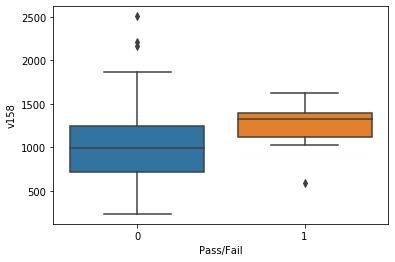

In [18]:
sns.boxplot(y='v158',x='Pass/Fail',data=df_2)

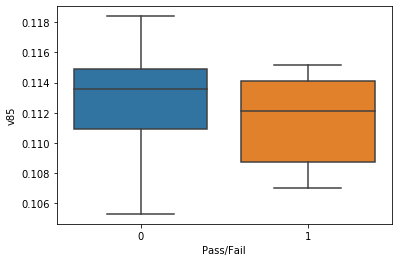

In [19]:
sns.boxplot(y='v85',x='Pass/Fail',data=df_2)

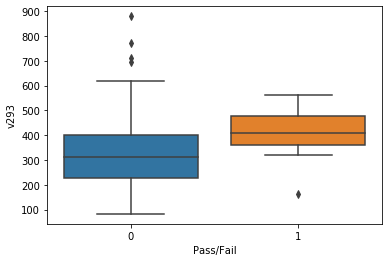

In [22]:
sns.boxplot(y='v293',x='Pass/Fail',data=df_2)

In [34]:
# 지우지말아야할것 85,158,293
erase_trash_feature = df_2.columns

c=df_2.isnull().astype(int).sum()

none50_100_feature = []
none10_50_feature = []
none0_10_feature = []
no_NaN_feature = []

length_rows =df_2.shape[0]

for i in range(len(c)):
    if c[i] >= int(length_rows*0.5):
        none50_100_feature.append(erase_trash_feature[i])
    elif c[i] >= int(length_rows*0.1) and c[i] < int(length_rows*0.5):
        none10_50_feature.append(erase_trash_feature[i])
    elif c[i] > 0 and c[i] < int(length_rows*0.1):
        none0_10_feature.append(erase_trash_feature[i])
    elif c[i] == 0:
        no_NaN_feature.append(erase_trash_feature[i])
        

print('50~100% NaN  amount : ', len(none50_100_feature),'  cols : ', none50_100_feature)
print('10~50% NaN  amount : ', len(none10_50_feature),'  cols : ', none10_50_feature)
print('0~10% NaN  amount : ', len(none0_10_feature),'  cols : ', none0_10_feature)
print('0% NaN  amount : ', len(no_NaN_feature),'  cols : ', no_NaN_feature)

50~100% NaN  amount :  28   cols :  ['v72', 'v73', 'v85', 'v109', 'v110', 'v111', 'v157', 'v158', 'v220', 'v244', 'v245', 'v246', 'v292', 'v293', 'v345', 'v346', 'v358', 'v382', 'v383', 'v384', 'v492', 'v516', 'v517', 'v518', 'v578', 'v579', 'v580', 'v581']
10~50% NaN  amount :  24   cols :  ['v112', 'v247', 'v385', 'v519', 'v546', 'v547', 'v548', 'v549', 'v550', 'v551', 'v552', 'v553', 'v554', 'v555', 'v556', 'v557', 'v562', 'v563', 'v564', 'v565', 'v566', 'v567', 'v568', 'v569']
0~10% NaN  amount :  370   cols :  ['v0', 'v1', 'v2', 'v3', 'v4', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v50', 'v51', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v70', 'v71', 'v74', 'v75', 'v76', 'v77', 'v78

In [35]:
unique_vals = df_2['Pass/Fail'].unique()  # [0, 1, 2]
targets = [df_2.loc[df_2['Pass/Fail'] == val] for val in unique_vals]

No handles with labels found to put in legend.


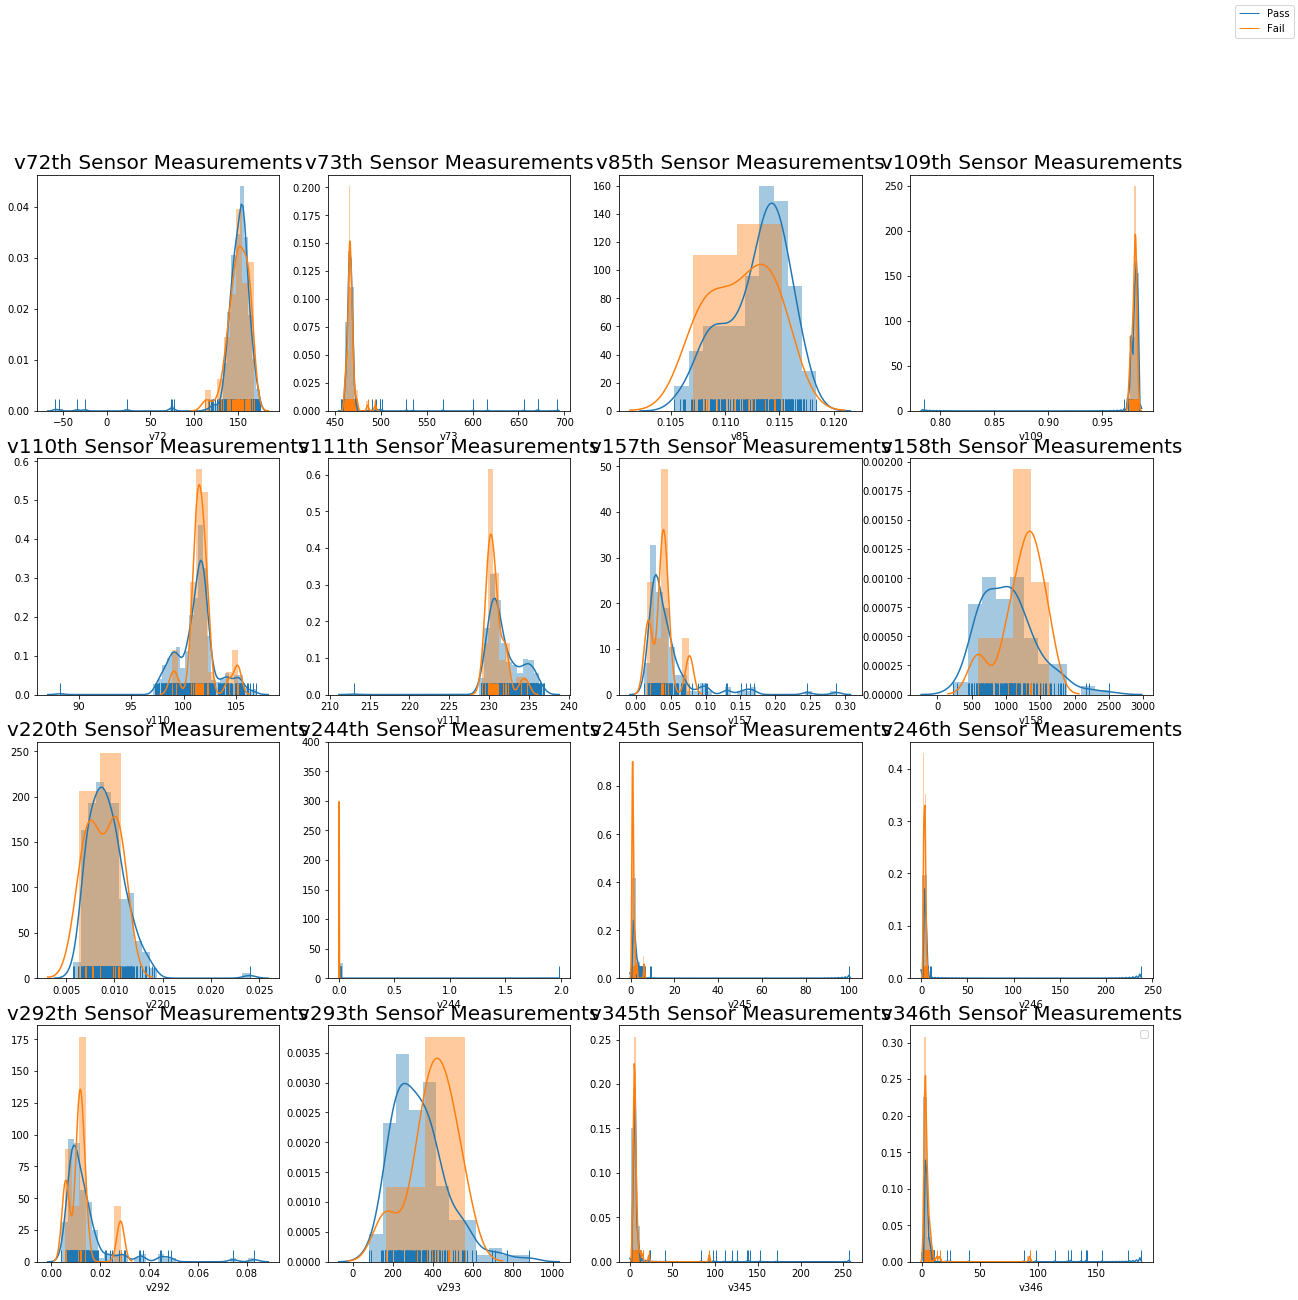

In [36]:
none50_100_feature_1=none50_100_feature[0:17]
fig = plt.figure(figsize=(20,20))
lists=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for i,j in zip(none50_100_feature_1,lists):
    plt.subplot(4, 4, j)
    for target in targets:
        sns.distplot(target[i], hist=True, rug=True)
        plt.title(i+'th Sensor Measurements', fontsize = 20)

#sns.add_legend()
plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()

In [37]:
non_remove_list=["v158",'v293','v85']
for i in non_remove_list:
    none50_100_feature.remove(i)

In [38]:
for i in non_remove_list:
    none10_50_feature.append(i)

In [39]:
df_2_1=df_2.drop(none50_100_feature,axis=1)
df_2_1

,Pass/Fail,v0,v1,v2,v3,v4,v6,v7,v8,v9,...,v576,v577,v582,v583,v584,v585,v586,v587,v588,v589
0,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,-1,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,-1,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,-1,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [40]:
df_2_0_10=df_2[none0_10_feature]
df_2_0_10

,v0,v1,v2,v3,v4,v6,v7,v8,v9,v10,...,v560,v561,v582,v583,v584,v585,v586,v587,v588,v589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.1039,42.3877,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.0375,18.1087,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.1233,24.7524,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.2710,62.7572,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.0461,22.0500,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,0.0929,32.3812,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,0.0696,32.1048,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,NaN,...,0.0332,13.0316,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,0.0435,18.9966,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [42]:
#절사평균 코드
def tmean(var, alpha):
    amount_null = var.isnull().astype(int).sum()

    df_var = pd.DataFrame(var)
    df_var = df_var.sort_values(by=df_var.columns[0], axis=0, na_position='first')

    a = round(alpha * len(var))
    trimmed_list = df_var[amount_null:]
    trimmed_list = trimmed_list[a:-a]

    trimmed_ave = trimmed_list.mean()
    #trimmed_ave = np.nansum(trimmed_list,axis=0)/len(trimmed_list)
    return trimmed_ave

In [44]:
trim_imputation = list(set(none0_10_feature))

In [45]:
for i in trim_imputation:
    k = tmean(df_2_0_10[i],0.15)
    df_2_0_10[[i]] = df_2_0_10[[i]].fillna(k)

In [46]:
df_2_10_50=df_2[none10_50_feature]

In [47]:
df_2_0 = df_2[no_NaN_feature]

In [48]:
df_3= pd.concat([df_2_0_10,df_2_0,df_2_10_50],axis=1,sort=False)

In [49]:
df_3_var=df_3.loc[:,"Pass/Fail"]

In [50]:
df_3_class=df_3[df_3.columns.difference(["Pass/Fail"])]

In [51]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.preprocessing import LabelEncoder

In [52]:
df_3_class_MF = MissForest().fit_transform(df_3_class)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7


In [53]:
df_3_imputation=pd.DataFrame(df_3_class_MF)
df_3_imputation.columns=df_3_class.columns

In [54]:
df_imputation_final=pd.concat([df_3_imputation,df_3_var],axis=1,sort=False)

In [55]:
df_imputation_final

,v0,v1,v10,v100,v101,v102,v103,v104,v105,v106,...,v90,v91,v92,v93,v94,v95,v96,v98,v99,Pass/Fail
0,3030.93,2564.00,-0.003400,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,...,8671.930100,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,-1
1,3095.78,2465.14,-0.014800,-0.0004,-0.0004,-0.0752,-0.0045,0.0002,0.0015,0.0000,...,8407.029900,0.1455,-0.0015,0.0000,-0.0005,0.0001,0.5854,-0.9353,-0.0158,-1
2,2932.61,2559.94,0.001300,0.0006,-0.0001,0.0134,-0.0026,-0.0016,-0.0006,0.0013,...,9317.169800,0.0553,0.0006,-0.0013,0.0000,0.0002,-0.1343,-0.1427,0.1218,1
3,2988.72,2479.90,-0.003300,-0.0002,0.0000,-0.0699,-0.0059,0.0003,0.0003,0.0021,...,8205.700000,0.0697,-0.0003,-0.0021,-0.0001,0.0002,0.0411,0.0177,-0.0195,-1
4,3032.24,2502.87,-0.007200,0.0004,-0.0003,0.0696,-0.0045,0.0002,0.0078,0.0000,...,9014.460000,0.0448,-0.0077,-0.0001,-0.0001,-0.0001,0.2189,-0.6704,-0.0167,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,-0.005700,0.0000,0.0000,-0.0988,-0.0094,-0.0012,-0.0002,-0.0011,...,9201.720100,0.1671,0.0002,0.0011,0.0000,0.0000,-0.0382,0.0730,0.0884,-1
1563,3052.31,2522.55,-0.009300,-0.0004,0.0002,0.0855,-0.0116,0.0005,0.0055,-0.0026,...,8624.859900,-0.3570,-0.0055,0.0026,0.0000,0.0001,-0.0821,0.4289,-0.0372,-1
1564,2978.81,2379.78,0.000286,-0.0001,-0.0002,0.0022,-0.0142,0.0002,-0.0033,0.0001,...,8992.670200,-0.0223,0.0034,-0.0001,-0.0002,0.0000,0.2516,-0.4311,-0.0177,-1
1565,2894.92,2532.01,0.003200,0.0004,0.0000,-0.1165,-0.0087,-0.0019,0.0036,0.0035,...,8817.088726,0.1759,-0.0036,-0.0034,0.0000,0.0001,-0.0926,-0.1023,0.1451,-1


In [56]:
# Pass =-1 -> Pass=0 으로 바꿔줌

df_imputation_final.loc[(df_imputation_final["Pass/Fail"])==-1,"Pass/Fail"]=0

In [57]:
df_imputation_final

,v0,v1,v10,v100,v101,v102,v103,v104,v105,v106,...,v90,v91,v92,v93,v94,v95,v96,v98,v99,Pass/Fail
0,3030.93,2564.00,-0.003400,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,...,8671.930100,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,0
1,3095.78,2465.14,-0.014800,-0.0004,-0.0004,-0.0752,-0.0045,0.0002,0.0015,0.0000,...,8407.029900,0.1455,-0.0015,0.0000,-0.0005,0.0001,0.5854,-0.9353,-0.0158,0
2,2932.61,2559.94,0.001300,0.0006,-0.0001,0.0134,-0.0026,-0.0016,-0.0006,0.0013,...,9317.169800,0.0553,0.0006,-0.0013,0.0000,0.0002,-0.1343,-0.1427,0.1218,1
3,2988.72,2479.90,-0.003300,-0.0002,0.0000,-0.0699,-0.0059,0.0003,0.0003,0.0021,...,8205.700000,0.0697,-0.0003,-0.0021,-0.0001,0.0002,0.0411,0.0177,-0.0195,0
4,3032.24,2502.87,-0.007200,0.0004,-0.0003,0.0696,-0.0045,0.0002,0.0078,0.0000,...,9014.460000,0.0448,-0.0077,-0.0001,-0.0001,-0.0001,0.2189,-0.6704,-0.0167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,-0.005700,0.0000,0.0000,-0.0988,-0.0094,-0.0012,-0.0002,-0.0011,...,9201.720100,0.1671,0.0002,0.0011,0.0000,0.0000,-0.0382,0.0730,0.0884,0
1563,3052.31,2522.55,-0.009300,-0.0004,0.0002,0.0855,-0.0116,0.0005,0.0055,-0.0026,...,8624.859900,-0.3570,-0.0055,0.0026,0.0000,0.0001,-0.0821,0.4289,-0.0372,0
1564,2978.81,2379.78,0.000286,-0.0001,-0.0002,0.0022,-0.0142,0.0002,-0.0033,0.0001,...,8992.670200,-0.0223,0.0034,-0.0001,-0.0002,0.0000,0.2516,-0.4311,-0.0177,0
1565,2894.92,2532.01,0.003200,0.0004,0.0000,-0.1165,-0.0087,-0.0019,0.0036,0.0035,...,8817.088726,0.1759,-0.0036,-0.0034,0.0000,0.0001,-0.0926,-0.1023,0.1451,0


In [58]:
df_imputation_final.to_csv("secom_imputation.csv")